In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import numpy as np
import random

In [50]:
batch_size = 128
latent_dim = 100
lr = 0.0002
epochs = 100

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [51]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

mnist_data = datasets.MNIST('.\data', train=True, download=True, transform=transform)

dataloader = torch.utils.data.DataLoader(mnist_data, batch_size=batch_size, shuffle=True)

In [52]:
def dc_gen_block(in_dim, out_dim):
  return nn.Sequential(
      nn.Linear(in_dim, out_dim), #aumentar a resolução da imagem
      nn.LeakyReLU(0.2, inplace=True)
  )

In [53]:
def dc_disc_block(in_dim, out_dim):
  return nn.Sequential(
      nn.Linear(in_dim, out_dim), #aumentar a resolução da imagem
      nn.Dropout(0.3),
      nn.LeakyReLU(0.2, inplace=True),
  )

In [54]:
class Generator(nn.Module):
  def __init__(self, in_dim):
    super(Generator, self).__init__()
    self.in_dim = in_dim
    self.gen = nn.Sequential(
        dc_gen_block(in_dim, 256),
        dc_gen_block(256, 512),
        dc_gen_block(512, 1024),
        nn.Linear(1024, 28*28),
        nn.Tanh()

    )
  def forward(self, x):
        return self.gen(x).view(x.size(0), 1, 28, 28)

In [55]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()
    self.disc = nn.Sequential(
        dc_disc_block(28*28, 1024),
        dc_disc_block(1024, 512),
        dc_disc_block(512, 256),
        nn.Linear(256, 1),
    )

  def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.disc(x)

In [56]:
def gen_loss(gen, disc, num_images, z_dim):
  noise = torch.randn(num_images, z_dim).to(device)
  fake = gen(noise)
  disc_pred = disc(fake)
  criterion = nn.BCEWithLogitsLoss()
  target = torch.ones_like(disc_pred)
  gen_loss = criterion(disc_pred, target)

  return gen_loss

In [57]:
def disc_loss(gen, disc, real, num_images, z_dim):
    criterion = nn.BCEWithLogitsLoss()
    noise = torch.randn(num_images, z_dim).to(device)
    fake = gen(noise)
    disc_pred_fake = disc(fake.detach())  # Detach para evitar treinar o gerador neste passo
    fake_loss = criterion(disc_pred_fake, torch.zeros_like(disc_pred_fake))
    disc_pred_real = disc(real)
    real_loss = criterion(disc_pred_real, torch.ones_like(disc_pred_real))

    total_loss = (real_loss + fake_loss) / 2
    return total_loss


In [58]:
generator = Generator(in_dim=latent_dim).to(device)
discriminator = Discriminator().to(device)

In [59]:
gen_opt = optim.Adam(generator.parameters(), lr=lr)
disc_opt = optim.Adam(discriminator.parameters(), lr=lr)

[Epoch 1/100] [Avg D loss: 0.37621344645013177] [Avg G loss: 4.0408519069269015]


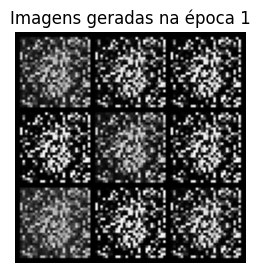

[Epoch 2/100] [Avg D loss: 0.45122412857470484] [Avg G loss: 2.678203575773788]


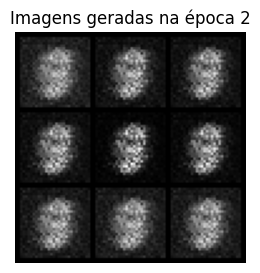

[Epoch 3/100] [Avg D loss: 0.4523295338378786] [Avg G loss: 1.900204120986243]


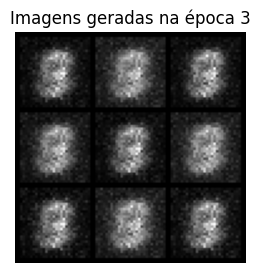

[Epoch 4/100] [Avg D loss: 0.32681252115539144] [Avg G loss: 3.010165691121555]


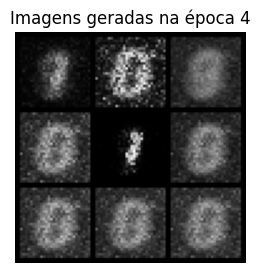

[Epoch 5/100] [Avg D loss: 0.19827916643131516] [Avg G loss: 3.220115042698663]


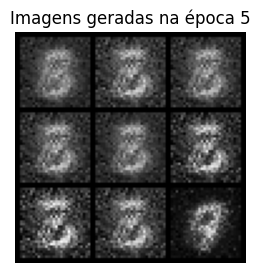

[Epoch 6/100] [Avg D loss: 0.20514969920902365] [Avg G loss: 3.5836076530566348]


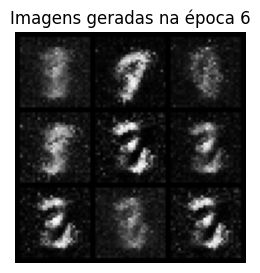

[Epoch 7/100] [Avg D loss: 0.2527210743728477] [Avg G loss: 2.992254571619827]


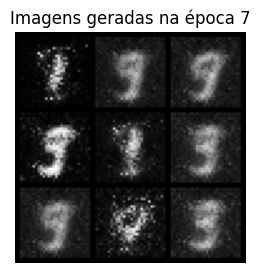

[Epoch 8/100] [Avg D loss: 0.24273079732206584] [Avg G loss: 3.035379695994005]


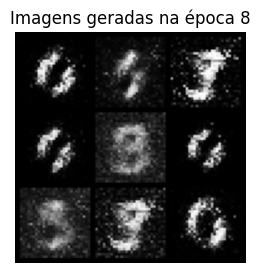

[Epoch 9/100] [Avg D loss: 0.2523131481111685] [Avg G loss: 2.8953385101452564]


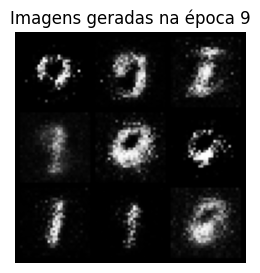

[Epoch 10/100] [Avg D loss: 0.25092620018130934] [Avg G loss: 2.933086228014818]


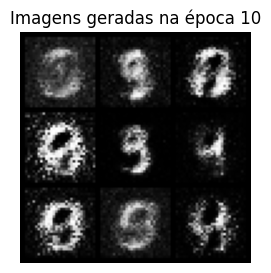

[Epoch 11/100] [Avg D loss: 0.2720430059187702] [Avg G loss: 2.713283661840313]


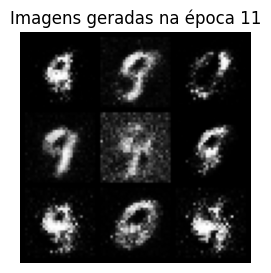

[Epoch 12/100] [Avg D loss: 0.3086840653978685] [Avg G loss: 2.542540124992826]


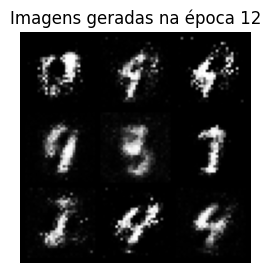

[Epoch 13/100] [Avg D loss: 0.30295458283505716] [Avg G loss: 2.5596011122152493]


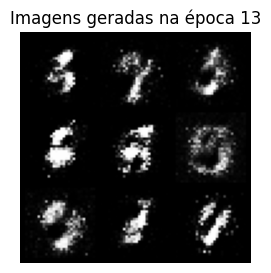

[Epoch 14/100] [Avg D loss: 0.3346892394808564] [Avg G loss: 2.3265912179499546]


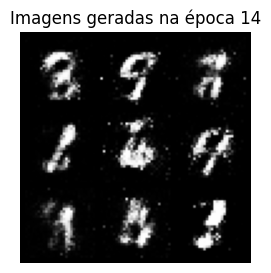

[Epoch 15/100] [Avg D loss: 0.337678563159539] [Avg G loss: 2.166571120209277]


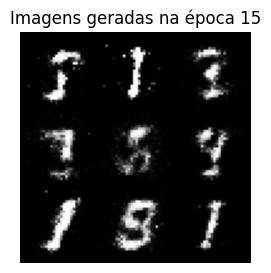

[Epoch 16/100] [Avg D loss: 0.3706176888777503] [Avg G loss: 2.096301401856103]


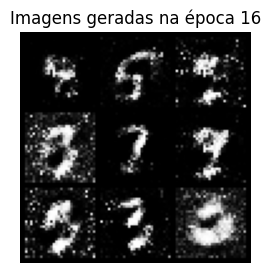

[Epoch 17/100] [Avg D loss: 0.37613602303492744] [Avg G loss: 2.010417208488562]


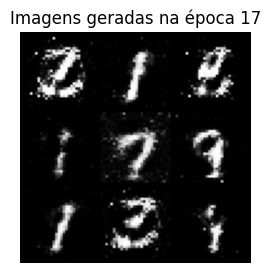

[Epoch 18/100] [Avg D loss: 0.3711261277450427] [Avg G loss: 1.9879527130106618]


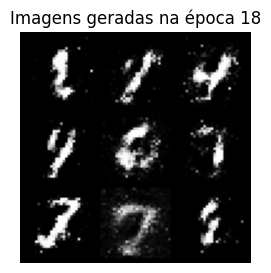

[Epoch 19/100] [Avg D loss: 0.3884785237914718] [Avg G loss: 1.9449214693834025]


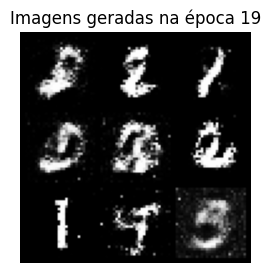

[Epoch 20/100] [Avg D loss: 0.3981606606036615] [Avg G loss: 1.8718999359907627]


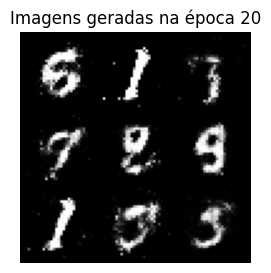

[Epoch 21/100] [Avg D loss: 0.43413229029315875] [Avg G loss: 1.734117383006285]


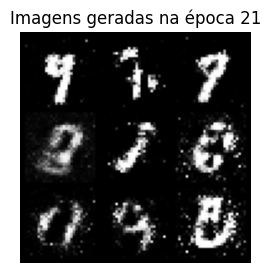

[Epoch 22/100] [Avg D loss: 0.4382068128791699] [Avg G loss: 1.7083268826450113]


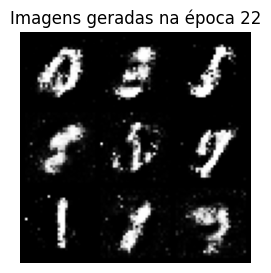

[Epoch 23/100] [Avg D loss: 0.42040566340692515] [Avg G loss: 1.792076384589108]


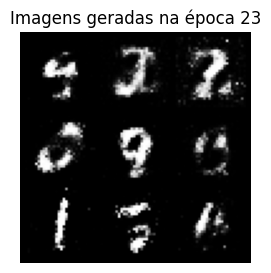

[Epoch 24/100] [Avg D loss: 0.44326875821105455] [Avg G loss: 1.7028258895314832]


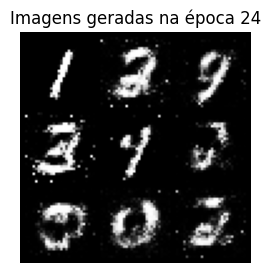

[Epoch 25/100] [Avg D loss: 0.4460100112820485] [Avg G loss: 1.632787242118738]


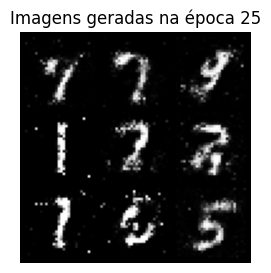

[Epoch 26/100] [Avg D loss: 0.46239978818496913] [Avg G loss: 1.6023298174079292]


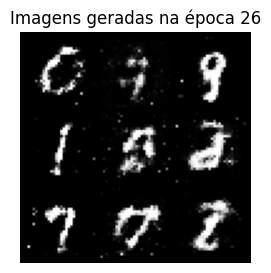

[Epoch 27/100] [Avg D loss: 0.453467364631482] [Avg G loss: 1.6400242497417719]


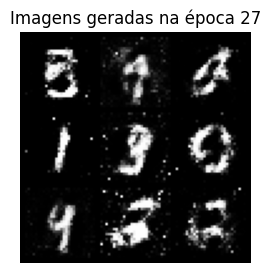

[Epoch 28/100] [Avg D loss: 0.46932424887665297] [Avg G loss: 1.5751663075327111]


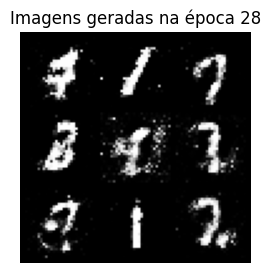

[Epoch 29/100] [Avg D loss: 0.46416775758332535] [Avg G loss: 1.5888417095009453]


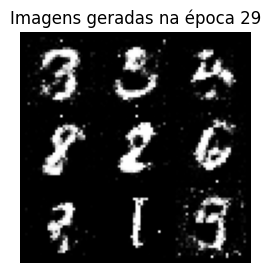

[Epoch 30/100] [Avg D loss: 0.4625725845919489] [Avg G loss: 1.609338729747577]


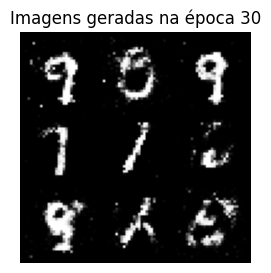

[Epoch 31/100] [Avg D loss: 0.4779315792294199] [Avg G loss: 1.5414741312517033]


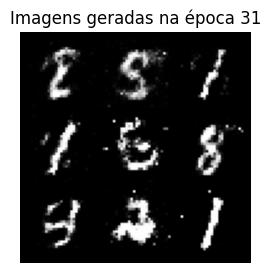

[Epoch 32/100] [Avg D loss: 0.4648937816813048] [Avg G loss: 1.555295596244747]


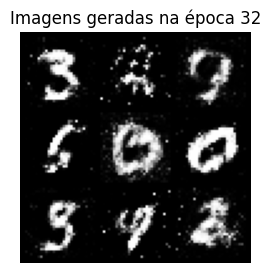

[Epoch 33/100] [Avg D loss: 0.47939814293562477] [Avg G loss: 1.5110750607590178]


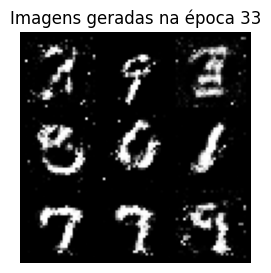

[Epoch 34/100] [Avg D loss: 0.48645441974404013] [Avg G loss: 1.4973336936060044]


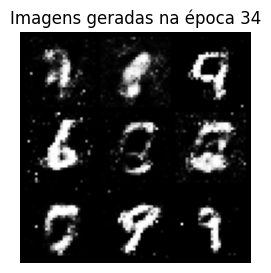

[Epoch 35/100] [Avg D loss: 0.49125568768871364] [Avg G loss: 1.4747332115925706]


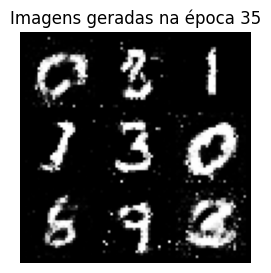

[Epoch 36/100] [Avg D loss: 0.49600434640068997] [Avg G loss: 1.4172772072525675]


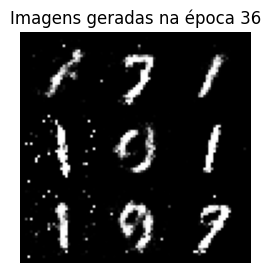

[Epoch 37/100] [Avg D loss: 0.5097956728579393] [Avg G loss: 1.3798201882254595]


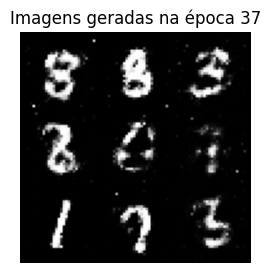

[Epoch 38/100] [Avg D loss: 0.5159421172985899] [Avg G loss: 1.3527080811925534]


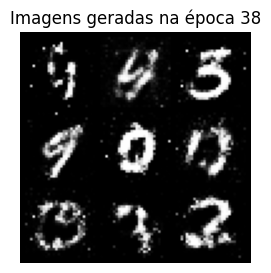

[Epoch 39/100] [Avg D loss: 0.5154611988743739] [Avg G loss: 1.3431276436299404]


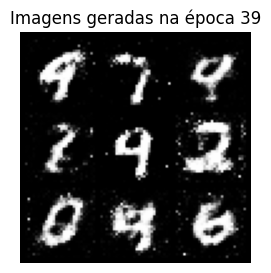

[Epoch 40/100] [Avg D loss: 0.5226640883666366] [Avg G loss: 1.3139945446555295]


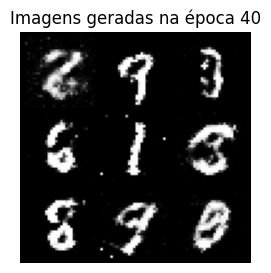

[Epoch 41/100] [Avg D loss: 0.5187919681260327] [Avg G loss: 1.3471706432065984]


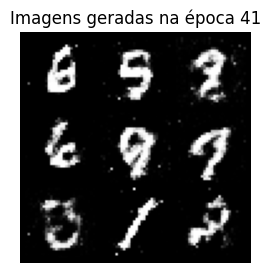

[Epoch 42/100] [Avg D loss: 0.5163827703705729] [Avg G loss: 1.3663400312476575]


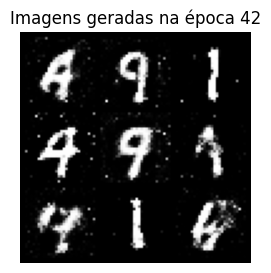

[Epoch 43/100] [Avg D loss: 0.5300297288498136] [Avg G loss: 1.2821563290380467]


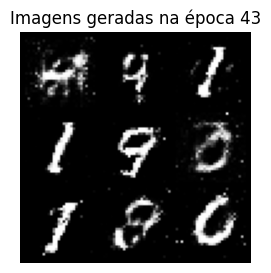

[Epoch 44/100] [Avg D loss: 0.5378082399048022] [Avg G loss: 1.2712412171526504]


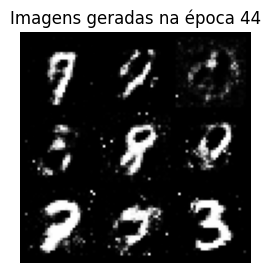

[Epoch 45/100] [Avg D loss: 0.5379838752212809] [Avg G loss: 1.2545980999210495]


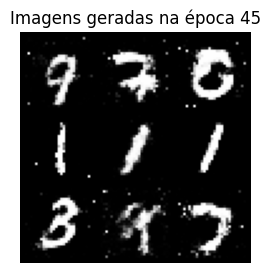

[Epoch 46/100] [Avg D loss: 0.5441191424566038] [Avg G loss: 1.22680457479664]


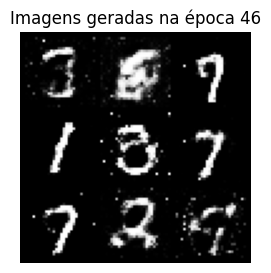

[Epoch 47/100] [Avg D loss: 0.5406724227262713] [Avg G loss: 1.2620418761838983]


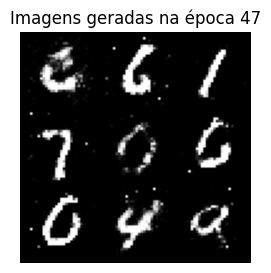

[Epoch 48/100] [Avg D loss: 0.5296149056857583] [Avg G loss: 1.2944406206165548]


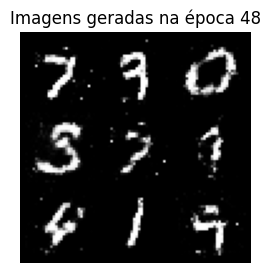

[Epoch 49/100] [Avg D loss: 0.5363545778717822] [Avg G loss: 1.2663609896387373]


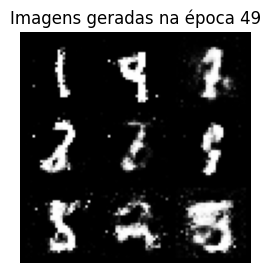

[Epoch 50/100] [Avg D loss: 0.5470353538420663] [Avg G loss: 1.2095414768658213]


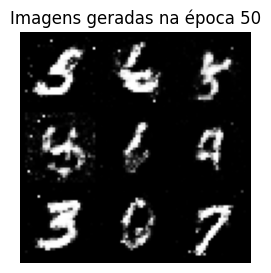

[Epoch 51/100] [Avg D loss: 0.5490777524930837] [Avg G loss: 1.235779752609318]


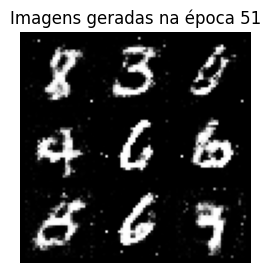

[Epoch 52/100] [Avg D loss: 0.5535618055349728] [Avg G loss: 1.1993164340061928]


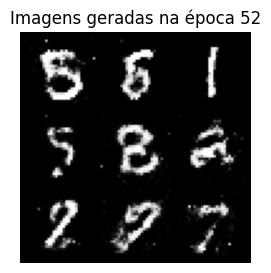

[Epoch 53/100] [Avg D loss: 0.5632323033011544] [Avg G loss: 1.1710540671338405]


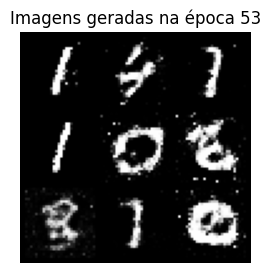

[Epoch 54/100] [Avg D loss: 0.5604215469568777] [Avg G loss: 1.187605859755453]


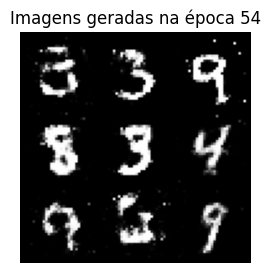

[Epoch 55/100] [Avg D loss: 0.5618610415758609] [Avg G loss: 1.169080027893408]


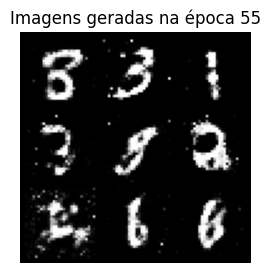

[Epoch 56/100] [Avg D loss: 0.5570366509052228] [Avg G loss: 1.179011930280657]


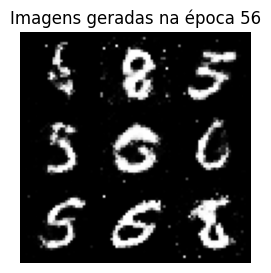

[Epoch 57/100] [Avg D loss: 0.5610678225819236] [Avg G loss: 1.173437210415472]


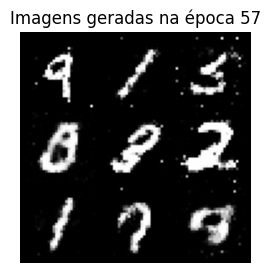

[Epoch 58/100] [Avg D loss: 0.571101744609601] [Avg G loss: 1.1413512665834]


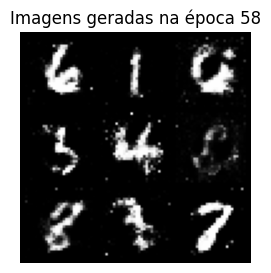

[Epoch 59/100] [Avg D loss: 0.5649879910925558] [Avg G loss: 1.1629434987934413]


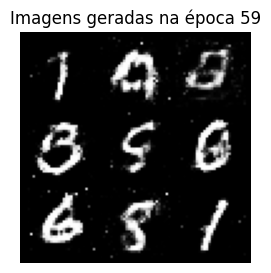

[Epoch 60/100] [Avg D loss: 0.5734518541456032] [Avg G loss: 1.123528994731049]


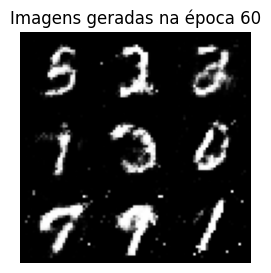

[Epoch 61/100] [Avg D loss: 0.5694369496440074] [Avg G loss: 1.1436339895099974]


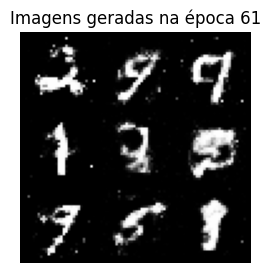

[Epoch 62/100] [Avg D loss: 0.5767460418408359] [Avg G loss: 1.121113409492761]


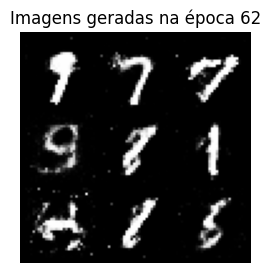

[Epoch 63/100] [Avg D loss: 0.582856885596379] [Avg G loss: 1.086438244212665]


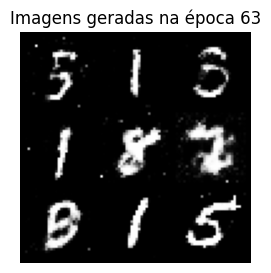

[Epoch 64/100] [Avg D loss: 0.5771342856543404] [Avg G loss: 1.1045765927605538]


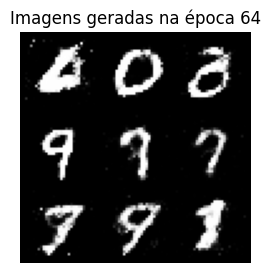

[Epoch 65/100] [Avg D loss: 0.5823999606470055] [Avg G loss: 1.1015090876296638]


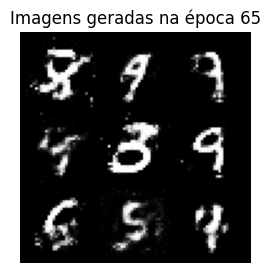

[Epoch 66/100] [Avg D loss: 0.5826536331222509] [Avg G loss: 1.0995591901766975]


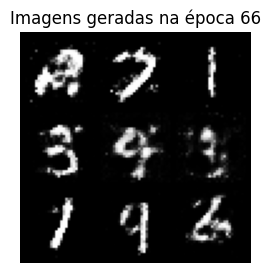

[Epoch 67/100] [Avg D loss: 0.5821335979743298] [Avg G loss: 1.086599918570854]


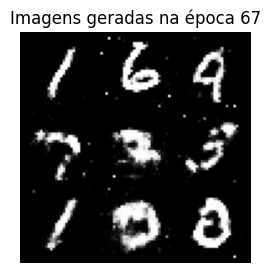

[Epoch 68/100] [Avg D loss: 0.5828918685028548] [Avg G loss: 1.0819277363036996]


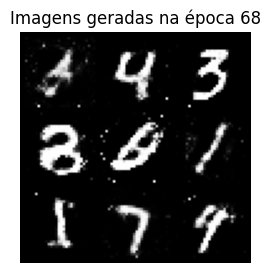

[Epoch 69/100] [Avg D loss: 0.5901118835914873] [Avg G loss: 1.0605384472336596]


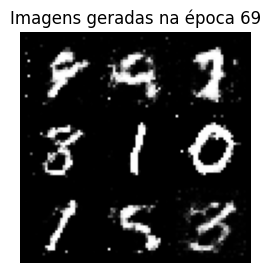

[Epoch 70/100] [Avg D loss: 0.5875458579454849] [Avg G loss: 1.0637884105700675]


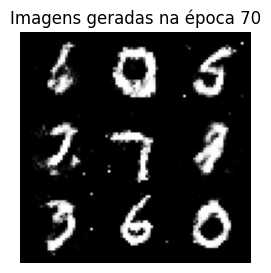

[Epoch 71/100] [Avg D loss: 0.5949943898074916] [Avg G loss: 1.055116736304277]


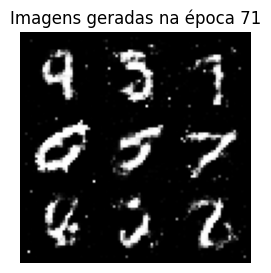

[Epoch 72/100] [Avg D loss: 0.5891453512568972] [Avg G loss: 1.0612171945541398]


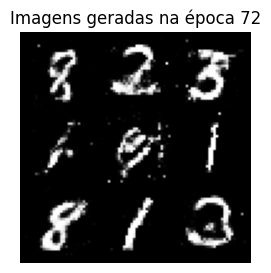

[Epoch 73/100] [Avg D loss: 0.5897454298508447] [Avg G loss: 1.0693867894123867]


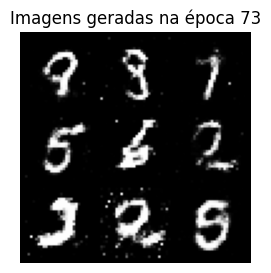

[Epoch 74/100] [Avg D loss: 0.5822502792771183] [Avg G loss: 1.087569082469574]


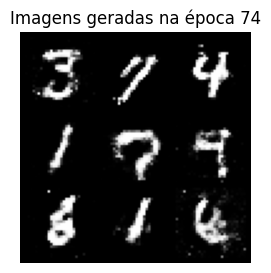

[Epoch 75/100] [Avg D loss: 0.59050917650845] [Avg G loss: 1.0565347370308344]


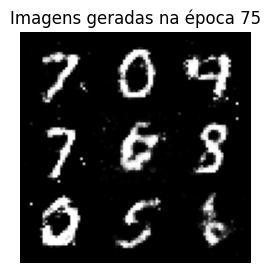

[Epoch 76/100] [Avg D loss: 0.584506044255645] [Avg G loss: 1.0851338575643772]


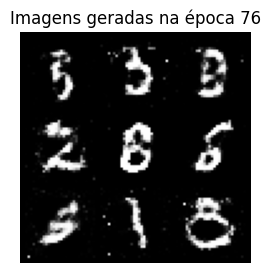

[Epoch 77/100] [Avg D loss: 0.5878909118394099] [Avg G loss: 1.072195783352801]


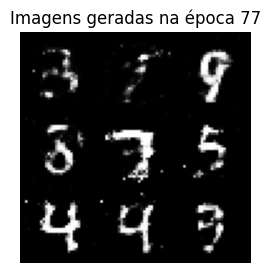

[Epoch 78/100] [Avg D loss: 0.5912033301045392] [Avg G loss: 1.0628097298811239]


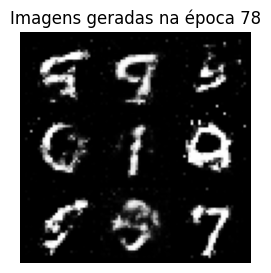

[Epoch 79/100] [Avg D loss: 0.5874729194620779] [Avg G loss: 1.0601227493174294]


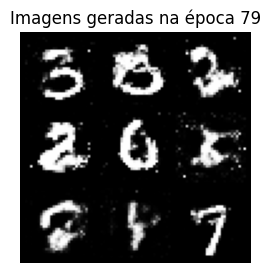

[Epoch 80/100] [Avg D loss: 0.5932899014527864] [Avg G loss: 1.0424627079638338]


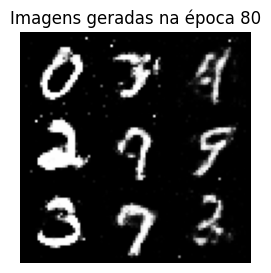

[Epoch 81/100] [Avg D loss: 0.597632581491206] [Avg G loss: 1.034761557573957]


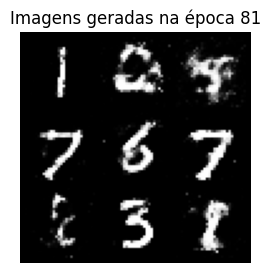

[Epoch 82/100] [Avg D loss: 0.6006705255142407] [Avg G loss: 1.013261548745861]


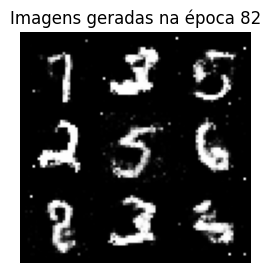

[Epoch 83/100] [Avg D loss: 0.5986048564600792] [Avg G loss: 1.0413611421961266]


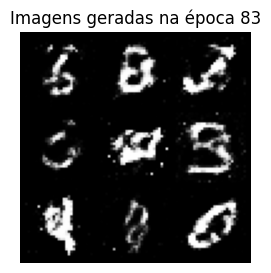

[Epoch 84/100] [Avg D loss: 0.5987561282191449] [Avg G loss: 1.0272222187981677]


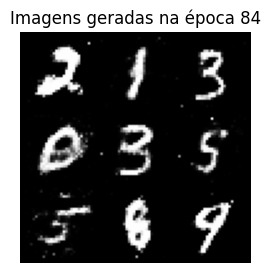

[Epoch 85/100] [Avg D loss: 0.6047208887427601] [Avg G loss: 1.0050834657540961]


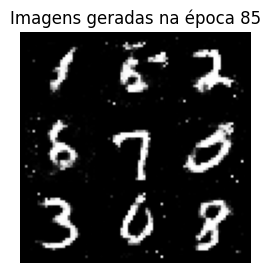

[Epoch 86/100] [Avg D loss: 0.6009729682509579] [Avg G loss: 1.0347095276755311]


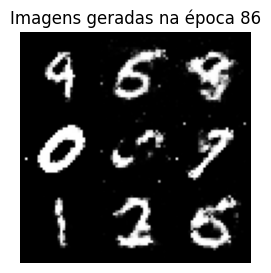

[Epoch 87/100] [Avg D loss: 0.5996620140985639] [Avg G loss: 1.028266483278417]


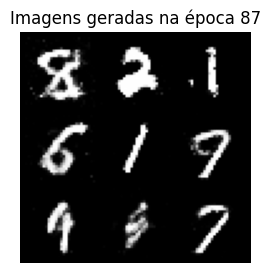

[Epoch 88/100] [Avg D loss: 0.5999388448210922] [Avg G loss: 1.0244067795495235]


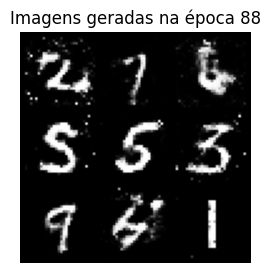

[Epoch 89/100] [Avg D loss: 0.6089198257623196] [Avg G loss: 1.01622126199035]


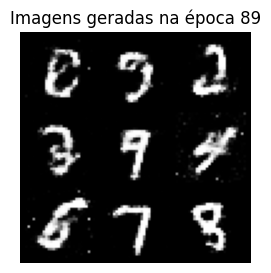

[Epoch 90/100] [Avg D loss: 0.599366045519233] [Avg G loss: 1.0295211400812878]


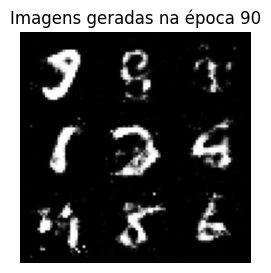

[Epoch 91/100] [Avg D loss: 0.6018948783117063] [Avg G loss: 1.032914348629746]


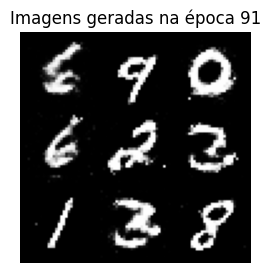

[Epoch 92/100] [Avg D loss: 0.607344806448483] [Avg G loss: 1.0007880361857953]


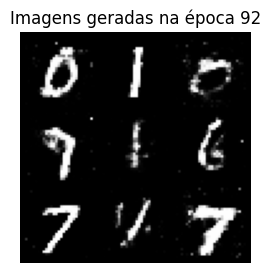

[Epoch 93/100] [Avg D loss: 0.6079733862297367] [Avg G loss: 0.9986558269336026]


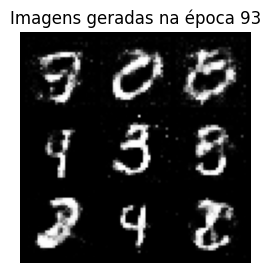

[Epoch 94/100] [Avg D loss: 0.6037463667169054] [Avg G loss: 1.0077171013045159]


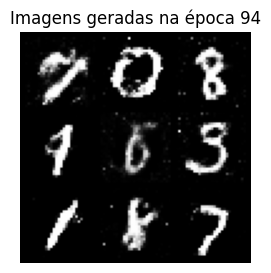

[Epoch 95/100] [Avg D loss: 0.6052272894870497] [Avg G loss: 1.0050428111924292]


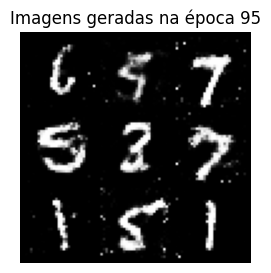

[Epoch 96/100] [Avg D loss: 0.6087081132412974] [Avg G loss: 0.9959124963420795]


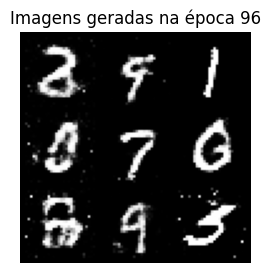

[Epoch 97/100] [Avg D loss: 0.6092616479788253] [Avg G loss: 1.0052705823993886]


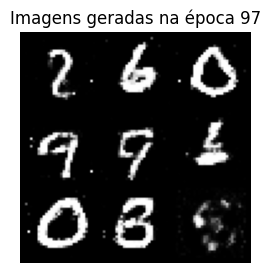

[Epoch 98/100] [Avg D loss: 0.611799458577943] [Avg G loss: 0.9850861512775868]


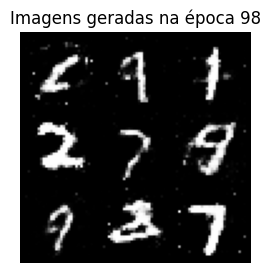

[Epoch 99/100] [Avg D loss: 0.6100642812658729] [Avg G loss: 0.9833397120555073]


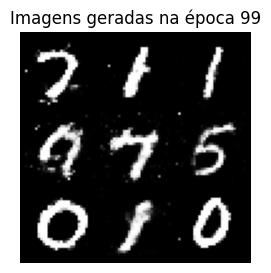

[Epoch 100/100] [Avg D loss: 0.615385060625544] [Avg G loss: 0.9673979710668389]


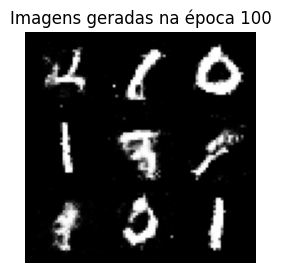

In [60]:
for epoch in range(epochs):  # Configurado para 10 épocas
    d_loss_acumulated = 0.0
    g_loss_acumulated = 0.0

    for real_images, _ in dataloader:  # Loop sobre os lotes
        real_images = real_images.to(device)  # Transferindo as imagens para o mesmo dispositivo
        cur_batch_size = real_images.size(0)  # Tamanho do batch

        # Atualização do discriminador
        disc_opt.zero_grad()
        disc_loss_value = disc_loss(generator, discriminator, real_images, cur_batch_size, latent_dim)
        disc_loss_value.backward()
        disc_opt.step()
        d_loss_acumulated += disc_loss_value.item()

        # Atualização do gerador
        gen_opt.zero_grad()
        gen_loss_value = gen_loss(generator, discriminator, cur_batch_size, latent_dim)
        gen_loss_value.backward()
        gen_opt.step()
        g_loss_acumulated += gen_loss_value.item()

    # Cálculo da perda média ao final de cada época (fora do loop de lotes)
    d_loss_avg = d_loss_acumulated / len(dataloader)
    g_loss_avg = g_loss_acumulated / len(dataloader)

    # Exibição da perda média da época
    print(f"[Epoch {epoch+1}/{epochs}] [Avg D loss: {d_loss_avg}] [Avg G loss: {g_loss_avg}]")

    # Geração de imagens para visualização ao final da época
    num_images_to_generate = 9
    noise = torch.randn(num_images_to_generate, latent_dim).to(device)  # Vetor latente aleatório
    with torch.no_grad():
        fake_imgs = generator(noise)

    # Criação do grid de imagens
    grid = torchvision.utils.make_grid(fake_imgs[:9], nrow=3, normalize=True)
    grid_numpy = grid.permute(1, 2, 0).cpu().numpy()

    # Exibição das imagens
    plt.figure(figsize=(3, 3))  # Ajuste o tamanho conforme necessário
    plt.imshow(grid_numpy)
    plt.axis('off')
    plt.title(f"Imagens geradas na época {epoch+1}")
    plt.show()
